Text(0.5, 0.92, 'Swiss Roll with Noise')

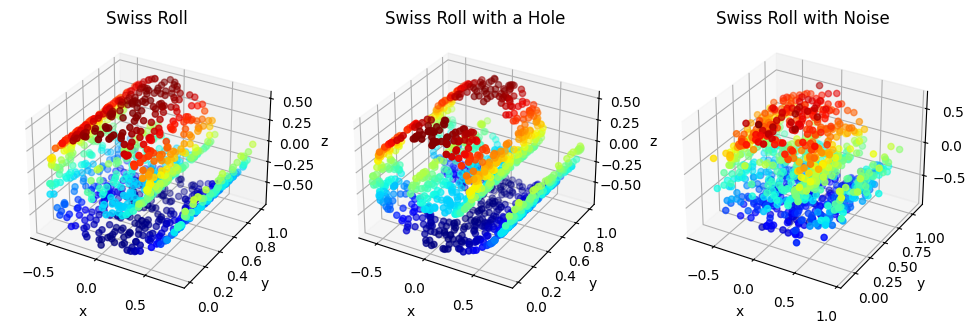

In [25]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
swiss_roll = scipy.io.loadmat('swiss_roll.mat')['x'].T
swiss_roll_hole = scipy.io.loadmat('swiss_roll_hole.mat')['x'].T
swiss_roll_noisy = scipy.io.loadmat('swiss_roll_noisy.mat')['x'].T

# plot the data in 3D
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(swiss_roll[:,0], swiss_roll[:,1], swiss_roll[:,2], c=swiss_roll[:,2], cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Swiss Roll')
ax = fig.add_subplot(132, projection='3d')
ax.scatter(swiss_roll_hole[:,0], swiss_roll_hole[:,1], swiss_roll_hole[:,2], c=swiss_roll_hole[:,2], cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Swiss Roll with a Hole')
ax = fig.add_subplot(133, projection='3d')
ax.scatter(swiss_roll_noisy[:,0], swiss_roll_noisy[:,1], swiss_roll_noisy[:,2], c=swiss_roll_noisy[:,2], cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Swiss Roll with Noise')
plt.savefig('swiss_roll.png')

## Isomap

The core idea behind Isomap is to preserve the geodesic distances (i.e., the shortest path in the manifold, not just in the Euclidean sense) between all pairs of points in the low-dimensional embedding.

__Nearest Neighbor Search__: Isomap starts by finding the nearest neighbors for each point in the dataset. This can be done using various methods like k-nearest neighbors (k-NN).

__Constructing the Graph__: It then constructs a neighborhood graph where each point is connected to its nearest neighbors. The edges of this graph are assigned weights equal to the Euclidean distance between the connected points.

__Estimating Geodesic Distances__: Isomap estimates the geodesic distances between all pairs of points by computing the shortest path in the neighborhood graph. This is usually done using algorithms like Dijkstra's or Floyd-Warshall.

__Multidimensional Scaling (MDS)__: Finally, Isomap applies Multidimensional Scaling (MDS) to the matrix of graph distances. MDS seeks a low-dimensional representation of the data that preserves these geodesic distances as much as possible.

The cost function that Isomap tries to optimize is essentially related to preserving the geodesic distances between points in the low-dimensional embedding. In other words, the algorithm tries to ensure that the distances between points in the reduced-dimensional space are as close as possible to the true geodesic distances in the high-dimensional space.

In [18]:
from sklearn.manifold import Isomap

In [48]:
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(swiss_roll)
swiss_roll_2d = isomap.transform(swiss_roll)
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(swiss_roll_hole)
swiss_roll_hole_2d = isomap.transform(swiss_roll_hole)
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(swiss_roll_noisy)
swiss_roll_noisy_2d = isomap.transform(swiss_roll_noisy)

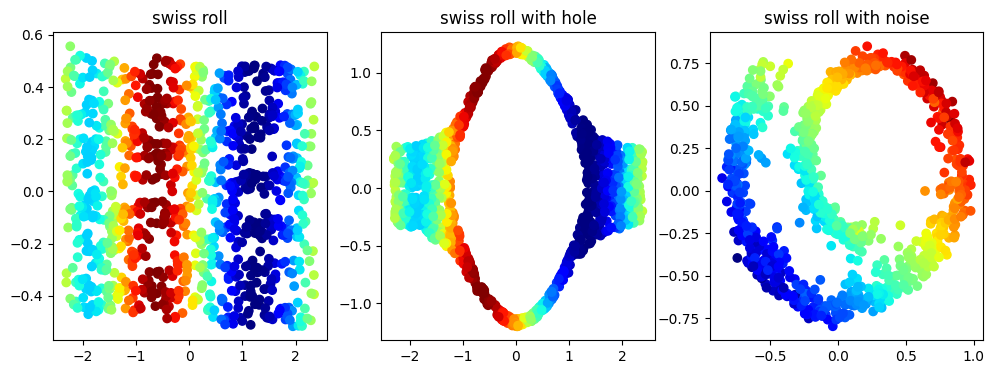

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(swiss_roll_2d[:,0], swiss_roll_2d[:,1], c=swiss_roll[:,2], cmap='jet')
plt.title('swiss roll')
plt.subplot(132)
plt.scatter(swiss_roll_hole_2d[:,0], swiss_roll_hole_2d[:,1], c=swiss_roll_hole[:,2], cmap='jet')
plt.title('swiss roll with hole')
plt.subplot(133)
plt.scatter(swiss_roll_noisy_2d[:,0], swiss_roll_noisy_2d[:,1], c=swiss_roll_noisy[:,2], cmap='jet')
plt.title('swiss roll with noise')
plt.savefig('swiss_roll_isomap.png')

## t-SNE (t-distributed Stochastic Neighbor Embedding)
The Idea of the Method: t-SNE starts by calculating the probability that pairs of datapoints in the high-dimensional space are similar, with similarity typically measured as conditional probabilities based on distances between points. Points that are close to each other have a high probability of being similar, while distant points have a low probability.It then maps these points to a low-dimensional space (usually 2D or 3D for visualization purposes) in a way that maintains this probability of similarity as much as possible. The idea is to have a similar probabilistic distribution in the low-dimensional space as in the high-dimensional space.

Cost Function: t-SNE aims to minimize the difference between these two probability distributions (the one in the original high-dimensional space and the one in the lower-dimensional space). This difference is measured using a cost function known as the Kullback-Leibler (KL) divergence. Minimizing the KL divergence is a central part of the t-SNE process, as it tries to ensure that similar points in the high-dimensional space remain close in the reduced space, and dissimilar points remain far apart.


In [50]:
from sklearn.manifold import TSNE
# use tsne to reduce the dimensionality of the data
tsne = TSNE(n_components=2, random_state=1)
swiss_roll_2d = tsne.fit_transform(swiss_roll)

tsne = TSNE(n_components=2, random_state=1)
swiss_roll_hole_2d = tsne.fit_transform(swiss_roll_hole)

tsne = TSNE(n_components=2, random_state=1)
swiss_roll_noisy_2d = tsne.fit_transform(swiss_roll_noisy)


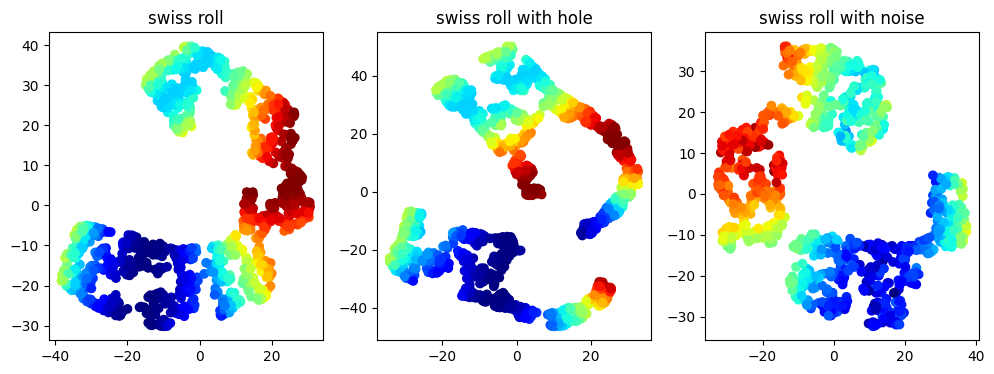

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(swiss_roll_2d[:,0], swiss_roll_2d[:,1], c=swiss_roll[:,2], cmap='jet')
plt.title('swiss roll')
plt.subplot(132)
plt.scatter(swiss_roll_hole_2d[:,0], swiss_roll_hole_2d[:,1], c=swiss_roll_hole[:,2], cmap='jet')
plt.title('swiss roll with hole')
plt.subplot(133)
plt.scatter(swiss_roll_noisy_2d[:,0], swiss_roll_noisy_2d[:,1], c=swiss_roll_noisy[:,2], cmap='jet')
plt.title('swiss roll with noise')
plt.savefig('swiss_roll_tsne.png')

## MNIST embedding

In [35]:
import torchvision
import torchvision.transforms as transforms
import torch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='/Users/yurusong/work/parallel_synapse_MNIST/data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=6000, shuffle=True)
for data in trainloader:
    images, labels = data
    break
images = images.numpy().reshape(6000, 784)
labels = labels.numpy()

In [43]:

isomap = Isomap(n_components=3, n_neighbors=50)
images_3d = isomap.fit_transform(images)


In [44]:
tsne = TSNE(n_components=3, random_state=1)
images_3d_tsne = tsne.fit_transform(images)

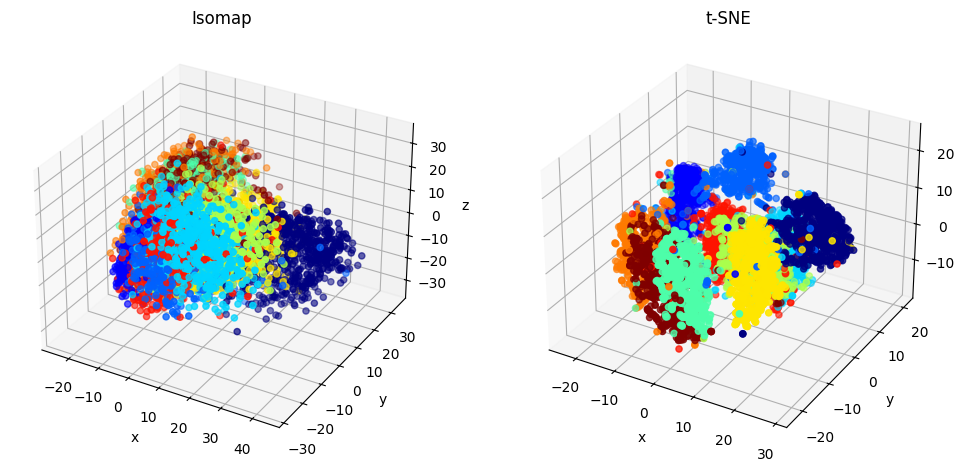

In [47]:
# visualize embedded image in 3d
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(images_3d[:,0], images_3d[:,1], images_3d[:,2], c=labels, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Isomap')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(images_3d_tsne[:,0], images_3d_tsne[:,1], images_3d_tsne[:,2], c=labels, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('t-SNE')
plt.savefig('mnist.png')
